# Projeto: Ligações para o 911

Para este projeto estaremos analisando alguns dados de chamadas para o 911 do [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)

Simplesmente acompanhe este notebook e tente completar as instruções ou responder as perguntas em negrito usando suas habilidades Python e Data Science!

## Dados e Configuração

** Importando as bibliotecas necessarias para análise**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Lendo o arquivo csv como um dataframe e chamando df e chamando o metodo info para fazermos as primeiras análises**

In [2]:
df = pd.read_csv('911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Verificando a contagem dos dados faltantes **

In [9]:
df.isnull().sum().reset_index() # já podemos ver que temos dados faltantes nas colunas diferentes de zeros

,index,0
0,lat,0
1,lng,0
2,desc,0
3,zip,12855
4,title,0
5,timeStamp,0
6,twp,43
7,addr,519
8,e,0
9,reason,0


## Perguntas básicas

** Quais são os top 5 CEPs nas chamadas 911? **

In [10]:
df['zip'].value_counts().head().reset_index() # Respondendo a pergunta, com a função value_counts 
# para conta as chamadas

,index,zip
0,19401.0,6979
1,19464.0,6643
2,19403.0,4854
3,19446.0,4748
4,19406.0,3174


** Quais são os 5 principais municípios nas chamadas 911? **

In [11]:
df.twp.value_counts().head().reset_index() # Respondendo a pergunta os 5 principais munipios que teve mais chamadas
# para o 911

,index,twp
0,LOWER MERION,8443
1,ABINGTON,5977
2,NORRISTOWN,5890
3,UPPER MERION,5227
4,CHELTENHAM,4575


** Dê uma olhada na coluna 'title'. Quantos códigos de título exclusivos existem? **

In [12]:
df.title.nunique() # temos 110 codigos de titulo unicos na coluna title

110

## Criando novos recursos

** Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS", "Fire" e "Traffic". Vamos usar uma função .apply () com uma expressão lambda personalizada para criar uma nova coluna chamada "Razão" que contém esse valor de string. **

In [13]:
df['reason'] = df['title'].apply(lambda title:title.split(':')[0]) # criando uma nova coluna no dataset separando 
# os titulos para facilitar a análise 

In [14]:
df['reason'].value_counts() # conhecendo a nova coluna, e o motivo mais comum das chamas para 911

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

** Agora vamos usar Seaborn para criar um countplot de chamadas 911 baseadas nesta nova coluna. **

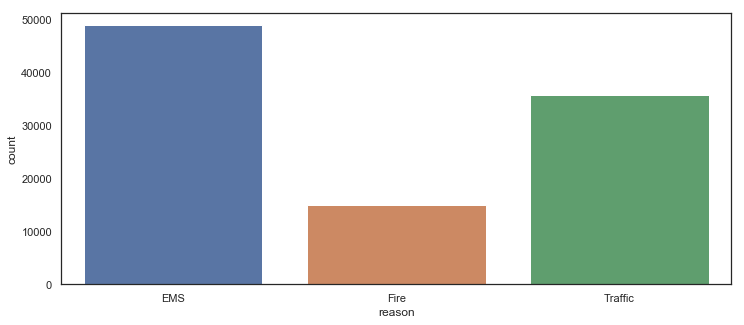

In [15]:
sns.set(style='white')
plt.figure(figsize = (12,5))
sns.countplot(x = 'reason',data = df)

** Agora vamos começar a focar em informações de tempo. Qual é o tipo de dados dos objetos na coluna timeStamp? **

In [16]:
type(df.timeStamp.iloc[1])

str

** Você deveria ter notado que esses timestamps ainda são strings. vamos usar o [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para converter a coluna de strings em objetos DateTime. **

In [17]:
df['timeStamp'] =pd.to_datetime(df['timeStamp'])

In [18]:
type(df['timeStamp'].iloc[0]) # vamos ver o tipo de dado dessa variavel

pandas._libs.tslibs.timestamps.Timestamp

** Agora você pode pegar atributos específicos de um objeto Datetime chamando-os. Por exemplo:**

    time = df['timeStamp'].iloc[0]
    time.hour

** Vamos usar usar o método de consulta de funções do Jupyter (Tab) para explorar. Agora que a coluna timestamp é realmente objetos DateTime, vamos usar a função .apply () para criar 3 novas colunas chamadas Hour, Month e Day of Week. **

In [19]:
df['time'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day of week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [20]:
df[['time','month','day of week']].head() # vamos conhecer as novas colunas criadas apartir da coluna timeStamp

,time,month,day of week
0,17,12,3
1,17,12,3
2,17,12,3
3,17,12,3
4,17,12,3


** Observe como o dia da demana é um número inteiro de 0-6. Use o .map () com este dicionário para mapear os nomes das seqüências reais para o dia da semana: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
df['day of week'] = df['day of week'].map(dmap) # etamos trocando os valores os numeros para os dias correspondentes da semana

In [23]:
df['day of week'].value_counts() # fazendo a contagem da variavel dias da semana 

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: day of week, dtype: int64

** Agora use Seaborn para criar um countplot da coluna "Day of Week" com a tonalidade baseada na coluna Reason. **

Text(0.5, 1.0, 'Distribuição da razão das ligações pelo dia da semana')

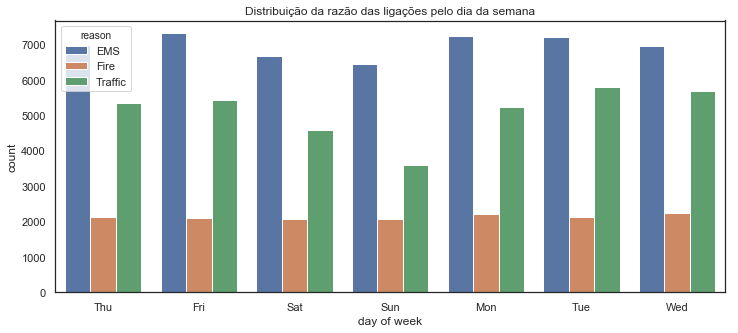

In [24]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'day of week',data = df,hue = 'reason')
plt.title('Distribuição da razão das ligações pelo dia da semana')

** Vamos fazer o mesmo para o mês: **

Text(0.5, 1.0, 'Razão das chamas distribuidas pelos meses do ano')

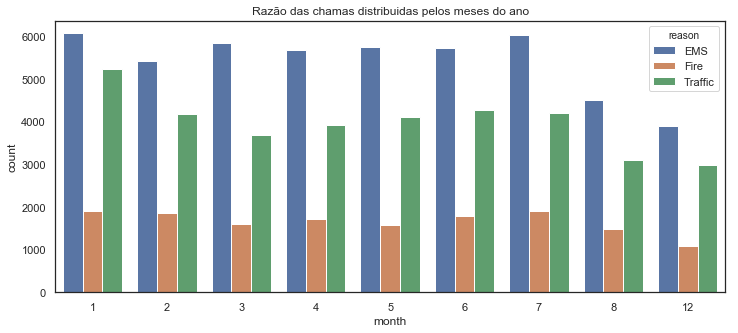

In [25]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'month',data = df,hue = 'reason')
plt.title('Razão das chamas distribuidas pelos meses do ano')

** Você notou algo estranho no Plot? **

_____

** Você deve ter notado que estavam faltando alguns meses. Vejamos se podemos talvez preencher essa informação ao traçar as informações de outra forma, possivelmente um plot de linha simples que preencha os meses que faltam. Para fazer isso, precisamos trabalhar com pandas...

** Agora vamos criar, um objeto groupby chamado "byMonth", onde você agrupa o DataFrame pela coluna do mês e use o método count() para agregação. Use o método head() neste DataFrame retornado. **

In [27]:
bymonth = df.groupby('month').count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,time,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Agora crie um plot simples fora do Dataframe indicando a contagem de chamadas por mês. **

Text(0.5, 1.0, 'Chamadas por mês')

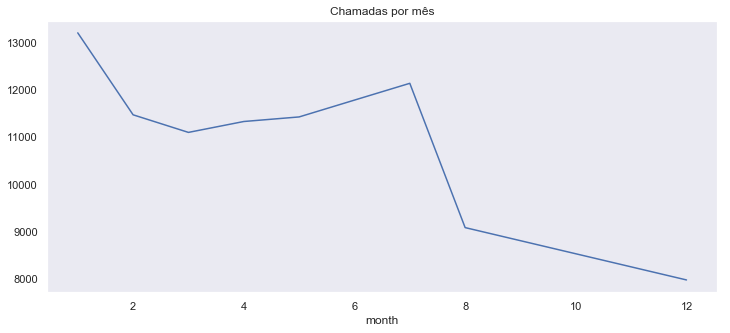

In [29]:
plt.figure(figsize =(12,5))     # Podemos notar que os ultimos meses temos menos chamadas
sns.set(style='dark')         
bymonth['twp'].plot()
plt.title('Chamadas por mês')

** Agora veja se você pode usar o lmplot () do Seaborn para criar um modelo linear no número de chamadas por mês. Tenha em mente que talvez seja necessário resetar o índice em uma coluna. **

Text(0.5, 1.0, 'Distribuição de Chamadas por Mês')

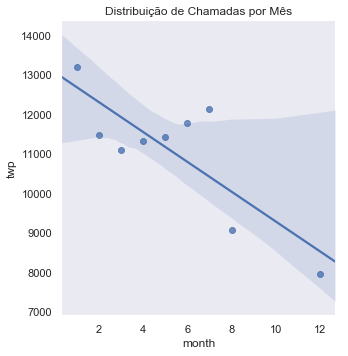

In [35]:
sns.lmplot(x ='month',y= 'twp',data = bymonth.reset_index())
plt.title('Distribuição de Chamadas por Mês')

** Crie uma nova coluna chamada 'Data' que contenha a data da coluna timeStamp. Você precisará usar .apply() junto com o método .date(). **

In [36]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())
df['date'].head(3)

0    2015-12-10
1    2015-12-10
2    2015-12-10
Name: date, dtype: object

** Agora agrupe esta coluna Data com o groupby. Usando o count (), crie um gráfico de contagens de chamadas 911. **

Text(0.5, 1.0, 'Chamadas agrupadas por data')

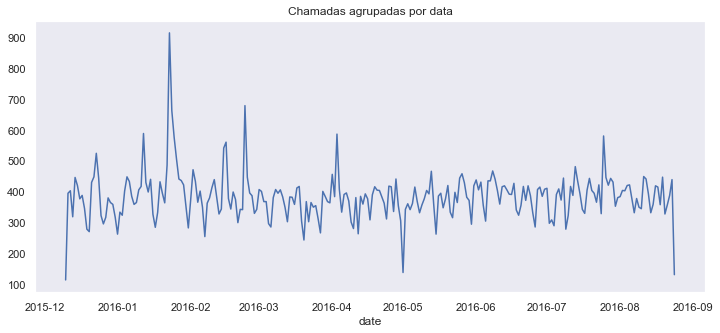

In [39]:
plt.figure(figsize = (12,5))
df.groupby('date').count()['twp'].plot()
plt.title('Chamadas agrupadas por data')

** Agora recrie esse plot, mas crie 3 plots separados com cada plot representando uma Razão para a chamada 911 **

Text(0.5, 1.0, 'Chamadas pela razão traffic')

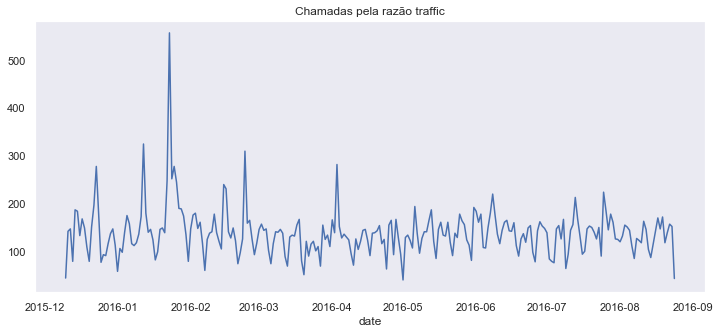

In [46]:
plt.figure(figsize = (12,5))
ems = df[df['reason'] =='Traffic'].groupby('date')['twp'].count().plot()
plt.title('Chamadas pela razão traffic')

Text(0.5, 1.0, 'Chamdas pela razão de fire')

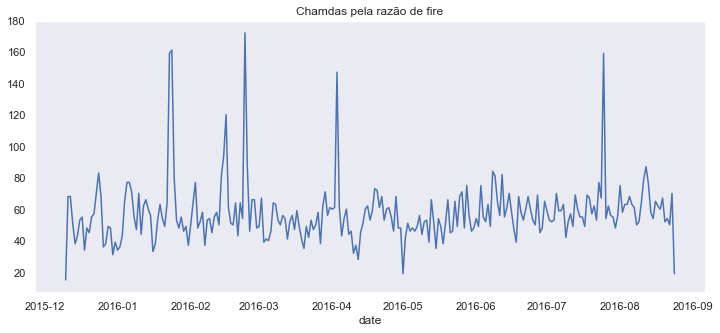

In [49]:
plt.figure(figsize =(12,5))
df[df['reason'] =='Fire'].groupby('date')['twp'].count().plot()   
plt.title('Chamdas pela razão de fire')

Text(0.5, 1.0, 'Chamadas pela razão EMS')

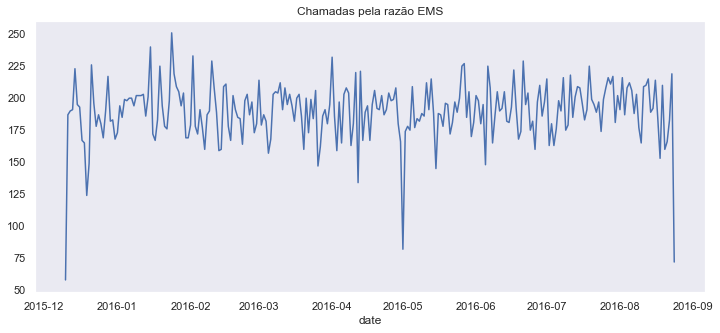

In [50]:
plt.figure(figsize = (12,5))
df[df['reason'] == 'EMS'].groupby('date')['twp'].count().plot()
plt.title('Chamadas pela razão EMS')

____
** Agora vamos continuar a criar mapas de calor com seaborn e nossos dados. Em primeiro lugar, devemos reestruturar o quadro de dados para que as colunas se tornem horas e o Índice se torne o Dia da Semana. Há muitas maneiras de fazer isso, mas eu recomendaria tentar combinar groupby com o método [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) . Consulte as soluções se você ficar preso nisso! **

In [52]:
dayhour = df.groupby(by = ['day of week','time']).count()['twp']
dayhour.unstack()

time,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tue,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


** Agora crie um mapa de calor usando este DataFrame **

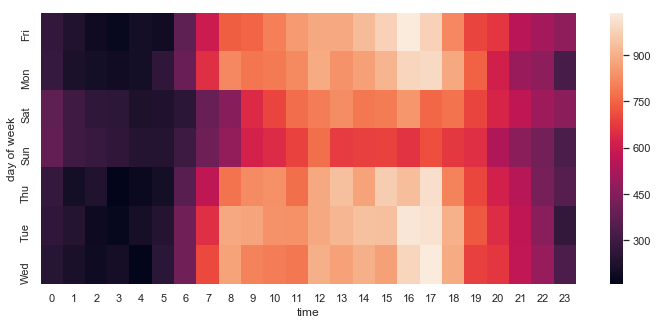

In [59]:
plt.figure(figsize = (12,5))
sns.heatmap(dayhour.unstack())

** Agora crie um clustermap usando este DataFrame. **

<Figure size 864x360 with 0 Axes>

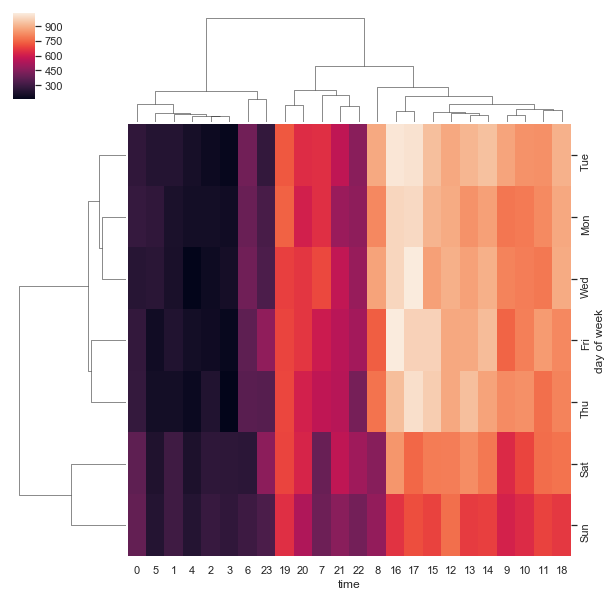

In [61]:
plt.figure(figsize = (12,5))
sns.clustermap(dayhour.unstack())

** Agora repita estes mesmos plots e operações para um DataFrame que mostra o mês como a coluna. **

In [64]:
daymonth = df.groupby(by =['day of week','month']).count()['twp']
daymonth.unstack()

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


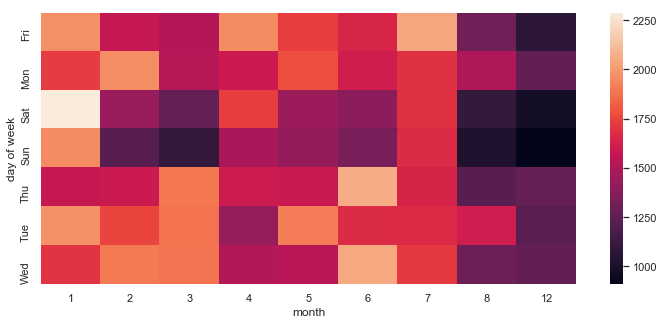

In [66]:
plt.figure(figsize =(12,5))
sns.heatmap(daymonth.unstack())

<Figure size 864x360 with 0 Axes>

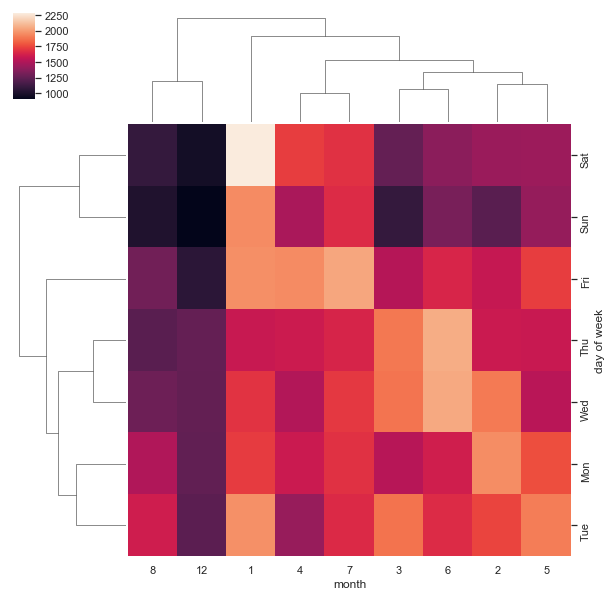

In [67]:
plt.figure(figsize =(12,5))
sns.clustermap(daymonth.unstack())